# Analog to Digital Conversion of  Voice

## By Alejandro Gómez Orjuela and Melanie Castaño Giraldo


## Introduction

#### Analog-to-digital conversion (ADC) is a crucial technique in digital signal processing that transforms continuous analog signals, like a human voice, into a digital format suitable for computer processing. This guide walks students through the complete ADC process, from recording a voice sample to analyzing its frequency characteristics. By the end of the project, students will gain practical experience with essential digital signal processing methods.

## Objective

#### This project focuses on practicing the analog-to-digital conversion process using a voice sample. Students will record a brief voice clip, remove silent intervals, and use sampling, quantization, and coding techniques to digitize the signal. Furthermore, students will apply Fourier transformation to examine the signal in the frequency domain, identify the typical frequency of the voice, and determine its frequency range.ange.

## 1.Import libraries

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

## 2.Import audio file

Audio duration: 21.36 secons
Sample Frecuency: 24000 Hz


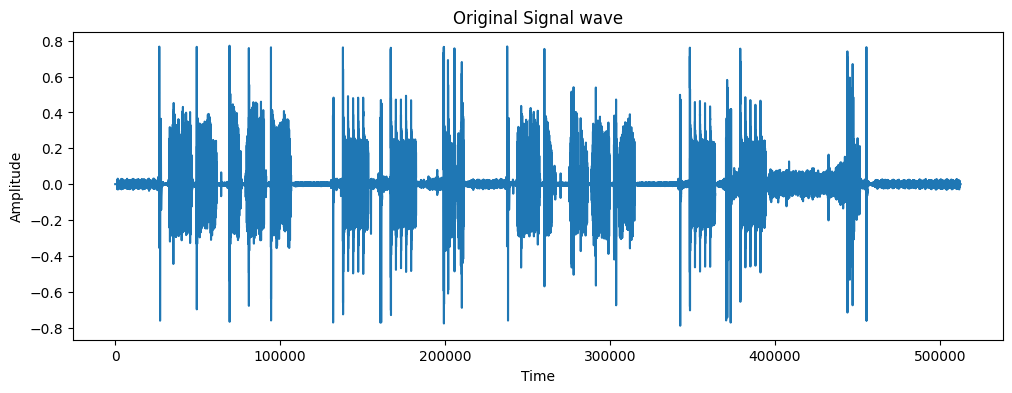

In [2]:
audio_path = 'data/voice.mp3'  
signal, sr = librosa.load(audio_path, sr=None)


print(f"Audio duration: {len(signal)/sr:.2f} secons")
print(f"Sample Frecuency: {sr} Hz")


plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('Original Signal wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## 2.Filtering the Silent Intervals

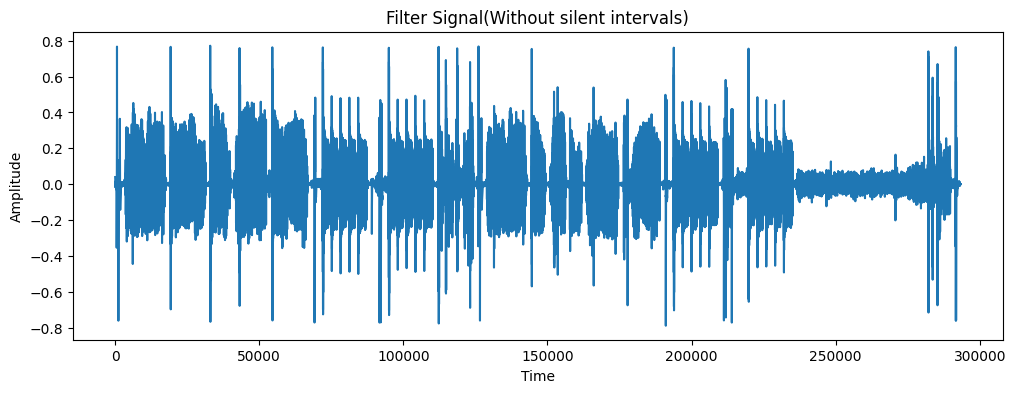

In [3]:

non_silent_intervals = librosa.effects.split(signal, top_db=20)
filtered_signal = np.concatenate([signal[start:end] for start, end in non_silent_intervals])

plt.figure(figsize=(12, 4))
plt.plot(filtered_signal)
plt.title('Filter Signal(Without silent intervals)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


## 3.Sampling, Quantization, and Coding

First 10 codificated values: [1080 1757 1498 1598 1488 1530 1416 1419 1323 1300]


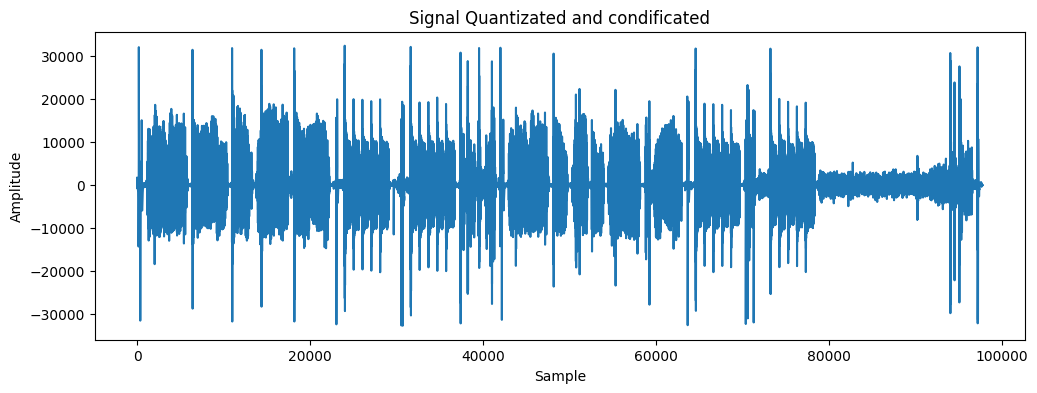

In [4]:

desired_sr = 8000
signal_resampled = librosa.resample(filtered_signal, orig_sr=sr, target_sr=desired_sr)


quantized_signal = np.int16(signal_resampled / np.max(np.abs(signal_resampled)) * 32767)


print("First 10 codificated values:", quantized_signal[:10])


plt.figure(figsize=(12, 4))
plt.plot(quantized_signal)
plt.title('Signal Quantizated and condificated')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


## 4.Fourier Transformation

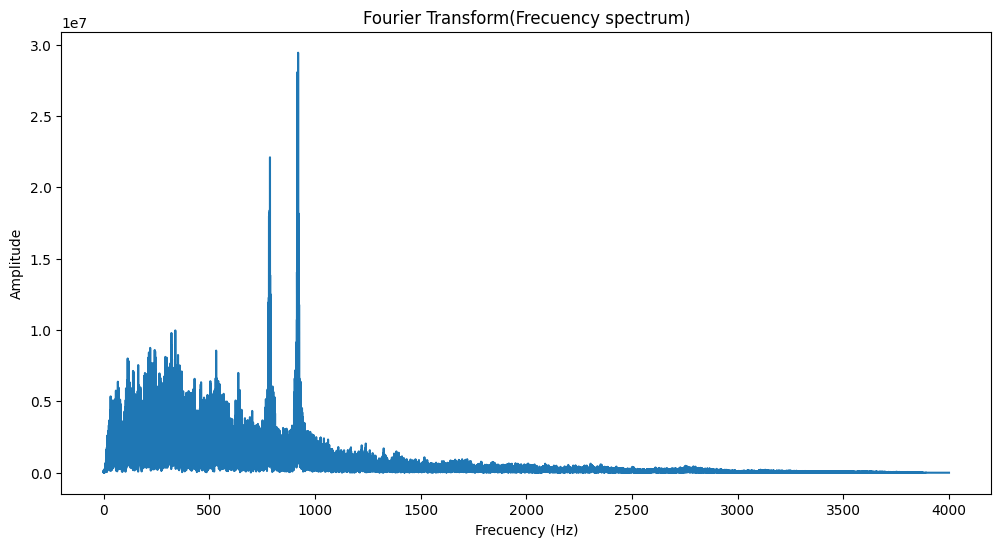

In [5]:
N = len(quantized_signal)
yf = fft(quantized_signal)
xf = fftfreq(N, 1 / desired_sr)

plt.figure(figsize=(12, 6))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title('Fourier Transform(Frecuency spectrum)')
plt.xlabel('Frecuency (Hz)')
plt.ylabel('Amplitude')
plt.show()

## 5.Visualizing the Frequency Histogram

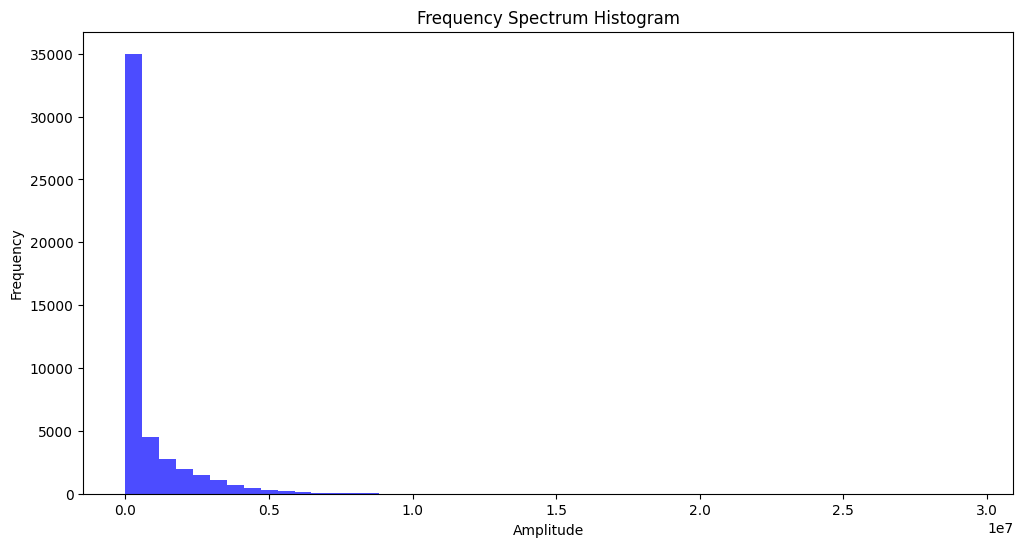

In [6]:
plt.figure(figsize=(12, 6))
plt.hist(np.abs(yf[:N//2]), bins=50, color='blue', alpha=0.7)
plt.title('Frequency Spectrum Histogram')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


## 6.Analyzing and Reporting

In [7]:
dominant_freq = xf[np.argmax(np.abs(yf[:N//2]))]
print(f"Dominant frequency: {dominant_freq:.2f} Hz")


threshold = np.max(np.abs(yf[:N//2])) * 0.1
freq_indices = np.where(np.abs(yf[:N//2]) > threshold)
freq_range = xf[:N//2][freq_indices]

if len(freq_range) > 0:
    print(f"Frequency range: {freq_range[0]:.2f} Hz to {freq_range[-1]:.2f} Hz")
else:
    print("No frequencies above the threshold were found.")

print(f"The dominant frequency of the recorded voice is {dominant_freq:.2f} Hz.")


Dominant frequency: 920.48 Hz
Frequency range: 24.13 Hz to 951.73 Hz
The dominant frequency of the recorded voice is 920.48 Hz.


## Conclusion

#### The analysis identified the dominant frequency and determined the frequency range of the voice signal, revealing its richness and variability. Digital signal processing techniques, such as filtering and Fourier transformation, preserved the signal's key characteristics. This practical experience is valuable in telecommunications and audio fields, though challenges like noise management and precise threshold selection must be addressed for accurate analysis.